## Planet challenge : preliminary analysis

### Tasks : 
- Look at the distribution of the label (global distribution & co-occurences)
- Analyze images : look at low dimension embeddings of the image using t-SNE  
- Given unbalanced distribution of labels, we might think a bit about the training set we want to build. 

Once we have done this we can start considerning models for classification (we may start with a simpler problem first to evaluate a broad category of models for ex : binary classification).

Also an other issue to address is which image to use. There is two type of images .jpg (low resolution) and .tiff (high resolution). 

### Notes and thoughts
Additionally to RGB data we also have access to infrared data. Infrared probably discrimate accurately between road and river (to test). 


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


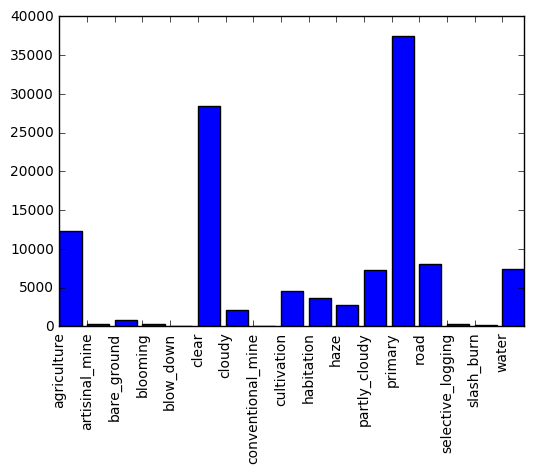

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preliminary data analysis 
# looking at the distribution of tags

labels = pd.read_csv("../data/train_v2.csv") # load trainning labels file
n = labels['image_name'].size       
labels = labels.values               # convert as numpy array

tags = [] # store all tags 
for i in range(n):
    curr_tag = labels[i,1]
    tags = np.append(tags, str.split(curr_tag)) 

unique, counts = np.unique(tags, return_counts=True)
all_tags = unique

# plot 
fig, ax = plt.subplots()
plt.xticks(range(len(counts)), unique)
plt.bar(range(len(counts)), counts)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.show()

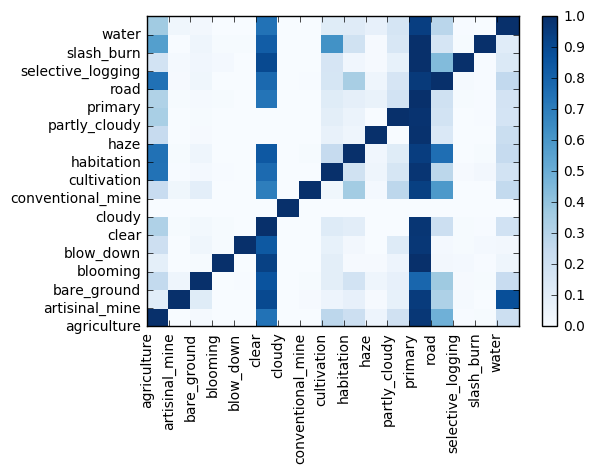

In [2]:
# look at co-occurence of tags 
res = dict()
for tag in all_tags:
    coocc = []    # store all co-occurences of current tag
    for i in range(n):
        curr_tag = str.split(labels[i,1], " ")
        if tag in curr_tag:
            coocc = np.append(coocc, curr_tag)

    # store stats for current tag
    if len(coocc) == 0:
        continue
    unique, counts = np.unique(coocc, return_counts=True)
    counts = counts/float(max(counts))    # normalize counts
    stats = dict(zip(unique,counts))
    res[tag] = stats
    
coocc_array = np.zeros((len(all_tags),len(all_tags)))
i = 0;
for tag1 in all_tags:
    j = 0
    for tag2 in all_tags:
        if tag1 in res.keys():
            curr = res[tag1]
            if tag2 in curr.keys():
                coocc_array[i, j] = curr[tag2]
        j = j + 1
    i = i + 1

fig, ax = plt.subplots()
plt.xticks(range(n), all_tags)
plt.yticks(range(n), all_tags)
plt.pcolor(coocc_array, cmap=plt.cm.Blues)
ax.set_yticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.colorbar()
plt.show()